## This notebook scrapes content from wikipedia to prepare a dataframe containing the neighbourhood and borough information of the city of Toronto, Canada.

In [1]:
# Use one of the following to install BeautifulSoup even though we may not use it.
!pip install --upgrade BeautifulSoup4
#!conda install -c conda-forge BeautifulSoup4 --yes 

Requirement already up-to-date: BeautifulSoup4 in c:\software\anaconda3\lib\site-packages (4.9.1)


##### various import statements

In [2]:
import numpy as np
import pandas as pd

import json
import sklearn
from IPython.display import Image
from sklearn.tree import export_graphviz
from IPython.display import HTML, display

import urllib.request as urlreq

from bs4 import BeautifulSoup

import seaborn as sbn
sbn.set_style("white")
sbn.set_palette("RdGy_r")
sbn.set_context('talk')

import matplotlib
%matplotlib inline

## Data Extraction from Wikipedia

In [4]:
wikipedia_toronto_postal_codes = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
#wikipedia_toronto_postal_codes = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050"
#wikipedia_toronto_additional_neighbourhoods = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto"

#### Read the Wikipedia page for listing by postal code

In [5]:
wikipedia_content_list_by_postalcode = pd.read_html(wikipedia_toronto_postal_codes)
wikipedia_content_by_postalcode_df  = pd.DataFrame(wikipedia_content_list_by_postalcode, columns = ['table_content'])
display(wikipedia_content_by_postalcode_df.head())
print(wikipedia_content_by_postalcode_df.shape)

,table_content
0,Postal Code Borough \ 0 ...
1,...
2,0 1 2 3 4 5 6 7 8 9 10 ...


(3, 1)


In [22]:
toronto_neighbourhood_by_postalcode_as_read_df = wikipedia_content_by_postalcode_df['table_content'].values[0]
toronto_neighbourhood_by_postalcode_as_read_df.columns = ['postalcode','borough','neighbourhood']
toronto_neighbourhood_by_postalcode_as_read_df.sort_values(['borough','neighbourhood'],inplace=True)
print(toronto_neighbourhood_by_postalcode_as_read_df.shape)
toronto_neighbourhood_by_postalcode_as_read_df.head()

(180, 3)


,postalcode,borough,neighbourhood
120,M4S,Central Toronto,Davisville
102,M4P,Central Toronto,Davisville North
103,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park"
93,M4N,Central Toronto,Lawrence Park
129,M4T,Central Toronto,"Moore Park, Summerhill East"


In [23]:
toronto_neighbourhood_by_postalcode_valid_df = toronto_neighbourhood_by_postalcode_as_read_df[toronto_neighbourhood_by_postalcode_as_read_df['borough'] != 'Not assigned']
print(toronto_neighbourhood_by_postalcode_valid_df.shape)
toronto_neighbourhood_by_postalcode_valid_df.head()

(103, 3)


,postalcode,borough,neighbourhood
120,M4S,Central Toronto,Davisville
102,M4P,Central Toronto,Davisville North
103,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park"
93,M4N,Central Toronto,Lawrence Park
129,M4T,Central Toronto,"Moore Park, Summerhill East"


In [24]:
toronto_neighbourhood_by_postalcode_grouped = toronto_neighbourhood_by_postalcode_valid_df.groupby(['postalcode'])
duplicate_postal_code_found = False
for postal_code, grouped_df in toronto_neighbourhood_by_postalcode_grouped:
    print(postal_code)
    display(grouped_df.head())
    if grouped_df.shape[0] > 1:
        print('Duplicate rows found in the dataframe')
        duplicate_postal_code_found = True
if ~duplicate_postal_code_found:
    print('No duplicate postal codes were found')

M1B


,postalcode,borough,neighbourhood
9,M1B,Scarborough,"Malvern, Rouge"


M1C


,postalcode,borough,neighbourhood
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"


M1E


,postalcode,borough,neighbourhood
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"


M1G


,postalcode,borough,neighbourhood
36,M1G,Scarborough,Woburn


M1H


,postalcode,borough,neighbourhood
45,M1H,Scarborough,Cedarbrae


M1J


,postalcode,borough,neighbourhood
54,M1J,Scarborough,Scarborough Village


M1K


,postalcode,borough,neighbourhood
63,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"


M1L


,postalcode,borough,neighbourhood
72,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"


M1M


,postalcode,borough,neighbourhood
81,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"


M1N


,postalcode,borough,neighbourhood
90,M1N,Scarborough,"Birch Cliff, Cliffside West"


M1P


,postalcode,borough,neighbourhood
99,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town..."


M1R


,postalcode,borough,neighbourhood
108,M1R,Scarborough,"Wexford, Maryvale"


M1S


,postalcode,borough,neighbourhood
117,M1S,Scarborough,Agincourt


M1T


,postalcode,borough,neighbourhood
126,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan"


M1V


,postalcode,borough,neighbourhood
135,M1V,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo..."


M1W


,postalcode,borough,neighbourhood
144,M1W,Scarborough,"Steeles West, L'Amoreaux West"


M1X


,postalcode,borough,neighbourhood
153,M1X,Scarborough,Upper Rouge


M2H


,postalcode,borough,neighbourhood
46,M2H,North York,Hillcrest Village


M2J


,postalcode,borough,neighbourhood
55,M2J,North York,"Fairview, Henry Farm, Oriole"


M2K


,postalcode,borough,neighbourhood
64,M2K,North York,Bayview Village


M2L


,postalcode,borough,neighbourhood
73,M2L,North York,"York Mills, Silver Hills"


M2M


,postalcode,borough,neighbourhood
82,M2M,North York,"Willowdale, Newtonbrook"


M2N


,postalcode,borough,neighbourhood
91,M2N,North York,"Willowdale, Willowdale East"


M2P


,postalcode,borough,neighbourhood
100,M2P,North York,York Mills West


M2R


,postalcode,borough,neighbourhood
109,M2R,North York,"Willowdale, Willowdale West"


M3A


,postalcode,borough,neighbourhood
2,M3A,North York,Parkwoods


M3B


,postalcode,borough,neighbourhood
11,M3B,North York,Don Mills


M3C


,postalcode,borough,neighbourhood
20,M3C,North York,Don Mills


M3H


,postalcode,borough,neighbourhood
47,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North"


M3J


,postalcode,borough,neighbourhood
56,M3J,North York,"Northwood Park, York University"


M3K


,postalcode,borough,neighbourhood
65,M3K,North York,Downsview


M3L


,postalcode,borough,neighbourhood
74,M3L,North York,Downsview


M3M


,postalcode,borough,neighbourhood
83,M3M,North York,Downsview


M3N


,postalcode,borough,neighbourhood
92,M3N,North York,Downsview


M4A


,postalcode,borough,neighbourhood
3,M4A,North York,Victoria Village


M4B


,postalcode,borough,neighbourhood
12,M4B,East York,"Parkview Hill, Woodbine Gardens"


M4C


,postalcode,borough,neighbourhood
21,M4C,East York,Woodbine Heights


M4E


,postalcode,borough,neighbourhood
30,M4E,East Toronto,The Beaches


M4G


,postalcode,borough,neighbourhood
39,M4G,East York,Leaside


M4H


,postalcode,borough,neighbourhood
48,M4H,East York,Thorncliffe Park


M4J


,postalcode,borough,neighbourhood
57,M4J,East York,"East Toronto, Broadview North (Old East York)"


M4K


,postalcode,borough,neighbourhood
66,M4K,East Toronto,"The Danforth West, Riverdale"


M4L


,postalcode,borough,neighbourhood
75,M4L,East Toronto,"India Bazaar, The Beaches West"


M4M


,postalcode,borough,neighbourhood
84,M4M,East Toronto,Studio District


M4N


,postalcode,borough,neighbourhood
93,M4N,Central Toronto,Lawrence Park


M4P


,postalcode,borough,neighbourhood
102,M4P,Central Toronto,Davisville North


M4R


,postalcode,borough,neighbourhood
111,M4R,Central Toronto,"North Toronto West, Lawrence Park"


M4S


,postalcode,borough,neighbourhood
120,M4S,Central Toronto,Davisville


M4T


,postalcode,borough,neighbourhood
129,M4T,Central Toronto,"Moore Park, Summerhill East"


M4V


,postalcode,borough,neighbourhood
138,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest..."


M4W


,postalcode,borough,neighbourhood
147,M4W,Downtown Toronto,Rosedale


M4X


,postalcode,borough,neighbourhood
156,M4X,Downtown Toronto,"St. James Town, Cabbagetown"


M4Y


,postalcode,borough,neighbourhood
165,M4Y,Downtown Toronto,Church and Wellesley


M5A


,postalcode,borough,neighbourhood
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


M5B


,postalcode,borough,neighbourhood
13,M5B,Downtown Toronto,"Garden District, Ryerson"


M5C


,postalcode,borough,neighbourhood
22,M5C,Downtown Toronto,St. James Town


M5E


,postalcode,borough,neighbourhood
31,M5E,Downtown Toronto,Berczy Park


M5G


,postalcode,borough,neighbourhood
40,M5G,Downtown Toronto,Central Bay Street


M5H


,postalcode,borough,neighbourhood
49,M5H,Downtown Toronto,"Richmond, Adelaide, King"


M5J


,postalcode,borough,neighbourhood
58,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands"


M5K


,postalcode,borough,neighbourhood
67,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange"


M5L


,postalcode,borough,neighbourhood
76,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel"


M5M


,postalcode,borough,neighbourhood
85,M5M,North York,"Bedford Park, Lawrence Manor East"


M5N


,postalcode,borough,neighbourhood
94,M5N,Central Toronto,Roselawn


M5P


,postalcode,borough,neighbourhood
103,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park"


M5R


,postalcode,borough,neighbourhood
112,M5R,Central Toronto,"The Annex, North Midtown, Yorkville"


M5S


,postalcode,borough,neighbourhood
121,M5S,Downtown Toronto,"University of Toronto, Harbord"


M5T


,postalcode,borough,neighbourhood
130,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park"


M5V


,postalcode,borough,neighbourhood
139,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har..."


M5W


,postalcode,borough,neighbourhood
148,M5W,Downtown Toronto,Stn A PO Boxes


M5X


,postalcode,borough,neighbourhood
157,M5X,Downtown Toronto,"First Canadian Place, Underground city"


M6A


,postalcode,borough,neighbourhood
5,M6A,North York,"Lawrence Manor, Lawrence Heights"


M6B


,postalcode,borough,neighbourhood
14,M6B,North York,Glencairn


M6C


,postalcode,borough,neighbourhood
23,M6C,York,Humewood-Cedarvale


M6E


,postalcode,borough,neighbourhood
32,M6E,York,Caledonia-Fairbanks


M6G


,postalcode,borough,neighbourhood
41,M6G,Downtown Toronto,Christie


M6H


,postalcode,borough,neighbourhood
50,M6H,West Toronto,"Dufferin, Dovercourt Village"


M6J


,postalcode,borough,neighbourhood
59,M6J,West Toronto,"Little Portugal, Trinity"


M6K


,postalcode,borough,neighbourhood
68,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place"


M6L


,postalcode,borough,neighbourhood
77,M6L,North York,"North Park, Maple Leaf Park, Upwood Park"


M6M


,postalcode,borough,neighbourhood
86,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"


M6N


,postalcode,borough,neighbourhood
95,M6N,York,"Runnymede, The Junction North"


M6P


,postalcode,borough,neighbourhood
104,M6P,West Toronto,"High Park, The Junction South"


M6R


,postalcode,borough,neighbourhood
113,M6R,West Toronto,"Parkdale, Roncesvalles"


M6S


,postalcode,borough,neighbourhood
122,M6S,West Toronto,"Runnymede, Swansea"


M7A


,postalcode,borough,neighbourhood
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


M7R


,postalcode,borough,neighbourhood
114,M7R,Mississauga,Canada Post Gateway Processing Centre


M7Y


,postalcode,borough,neighbourhood
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."


M8V


,postalcode,borough,neighbourhood
142,M8V,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores"


M8W


,postalcode,borough,neighbourhood
151,M8W,Etobicoke,"Alderwood, Long Branch"


M8X


,postalcode,borough,neighbourhood
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"


M8Y


,postalcode,borough,neighbourhood
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


M8Z


,postalcode,borough,neighbourhood
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


M9A


,postalcode,borough,neighbourhood
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"


M9B


,postalcode,borough,neighbourhood
17,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov..."


M9C


,postalcode,borough,neighbourhood
26,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe..."


M9L


,postalcode,borough,neighbourhood
80,M9L,North York,Humber Summit


M9M


,postalcode,borough,neighbourhood
89,M9M,North York,"Humberlea, Emery"


M9N


,postalcode,borough,neighbourhood
98,M9N,York,Weston


M9P


,postalcode,borough,neighbourhood
107,M9P,Etobicoke,Westmount


M9R


,postalcode,borough,neighbourhood
116,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."


M9V


,postalcode,borough,neighbourhood
143,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


M9W


,postalcode,borough,neighbourhood
152,M9W,Etobicoke,"Northwest, West Humber - Clairville"


No duplicate postal codes were found


In [25]:
def assign_neighbourhood(borough_list, neighbourhood_list):
    return_values = []
    for borough, neighbourhood in zip(borough_list,neighbourhood_list):
        if pd.isna(neighbourhood) or neighbourhood == 'Not assigned':
            return_values.append(borough)
        else:
            return_values.append(neighbourhood)
    return return_values

toronto_neighbourhood_by_postalcode_valid_df['neighbourhood'] = assign_neighbourhood(toronto_neighbourhood_by_postalcode_valid_df['borough'].values,
                                                                                                                                                                       toronto_neighbourhood_by_postalcode_valid_df['neighbourhood'].values)
                                                                                                                                            
print(toronto_neighbourhood_by_postalcode_valid_df.shape)
toronto_neighbourhood_by_postalcode_valid_df.head()

(103, 3)


C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,postalcode,borough,neighbourhood
120,M4S,Central Toronto,Davisville
102,M4P,Central Toronto,Davisville North
103,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park"
93,M4N,Central Toronto,Lawrence Park
129,M4T,Central Toronto,"Moore Park, Summerhill East"


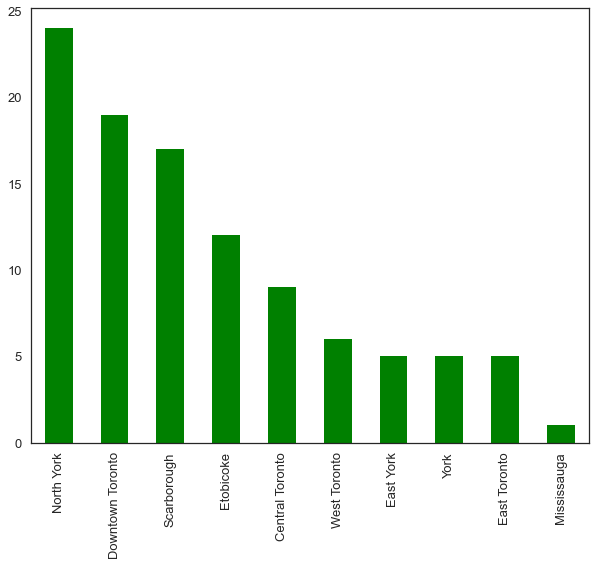

In [26]:
toronto_neighbourhood_by_postalcode_valid_df['borough'].value_counts().plot(kind='bar', color='g', figsize=(10,8))

In [27]:
toronto_neighbourhood_by_postalcode_valid_df.shape

(103, 3)